In [48]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")
mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'

train = pd.read_csv('/home/yahwang/elice/titanic_train.csv')

##  Count 시각화

### * 기본 - .value_counts 와 DataFrame.plot 을 활용해 시각화용 DataFrame을 만든다.
    DataFrame.plot은 NA값을 자동으로 무시하고 계산한다.

In [49]:
# DataFrame 형태를 만들어서 plot한다.
feature='Sex'
survived = train.query('Survived ==1')[feature].value_counts()
dead = train.query('Survived ==0')[feature].value_counts()
df = pd.DataFrame([survived, dead]) # df = pd.concat([survived, dead], axis=1).T 
df.index = ['Survived', 'Dead'] # DataFrame의 index로 조건에 맞는 String 값을 넣어준다.
df

,female,male
Survived,233,109
Dead,81,468


[None, None, None, None]

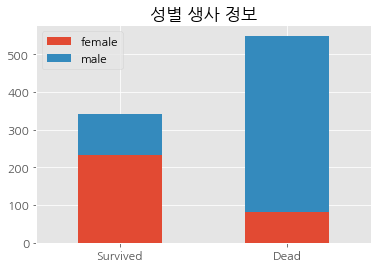

In [50]:
# X축이 index, Y축은 컬럼별 value, 다른 컬럼은 색깔로 구분한다.
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(6,4)
df.plot(kind='bar', stacked=True, ax=ax)
ax.set(title="성별 생사 정보")
plt.setp(ax.get_xticklabels(), rotation=0)

#### 조건이 여러 개일 경우,

In [51]:
pclass_cabin = train[['Pclass','Cabin']].copy()
pclass_cabin.Cabin = pclass_cabin.Cabin.map(lambda x: x[0], na_action='ignore') # 데이터 전처리
df = pd.DataFrame() # 빈 데이터프레임 생성
class_index = {1:'1st class', 2:'2nd class', 3:'3rd class'} # index mapping을 위한 dict 생성
for class_num in sorted(pclass_cabin.Pclass.unique()): 
    add_df = pclass_cabin.query('Pclass==@class_num').Cabin.value_counts().to_frame().T # 조건별 데이터프레임 생성
    add_df.index = [class_index[class_num]] # dict를 활용한 index mapping
    df = pd.concat([df,add_df],sort=False) # 데이터프레임 결합 ( concat은 컬럼 개수가 달라도 결합 가능 )

[None, None, None, None, None, None]

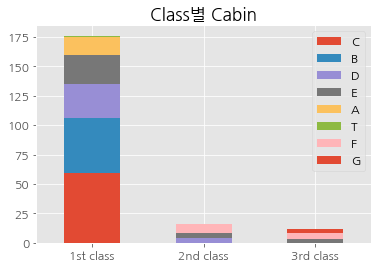

In [52]:
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(6,4)
df.plot(kind='bar', stacked=True, ax=ax)
ax.set(title="Class별 Cabin")
plt.setp(ax.get_xticklabels(), rotation=0)

### * seaborn - countplot을 활용
    x 또는 y 에 column명을 넣는다. 참고 : NA 값은 무시하고 계산한다.

[Text(0.5, 1.0, '성별 정보')]

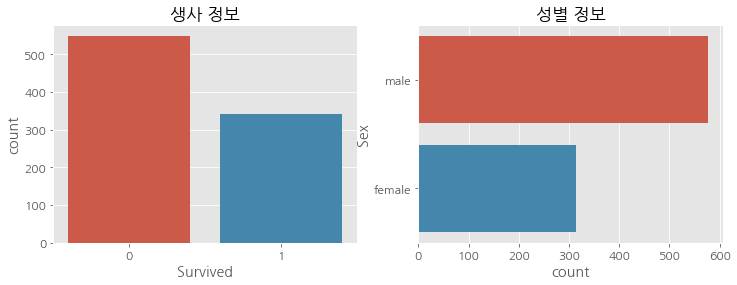

In [53]:
figure, (ax1,ax2) = plt.subplots(ncols=2,nrows=1)
figure.set_size_inches(12,4)
sns.countplot( x='Survived', data=train, ax=ax1) # x : 세로 bar
sns.countplot( y='Sex', data=train, ax=ax2) # y: 가로 bar
ax1.set(title="생사 정보")
ax2.set(title="성별 정보")

#### hue : 해당 컬럼의 value 별로 색깔로 구분하여 출력 ( stacked 처리는 지원하지 않는다. )

[Text(0.5, 1.0, '성별 생사 정보')]

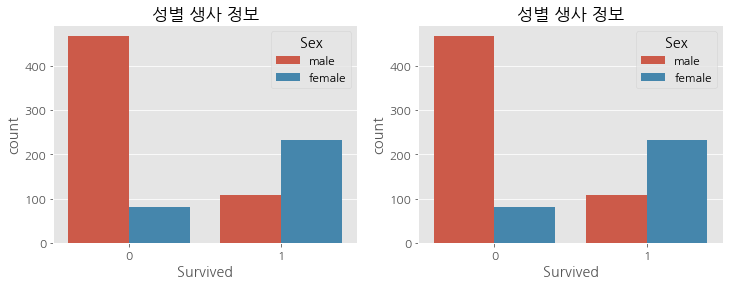

In [54]:
figure, (ax1,ax2) = plt.subplots(ncols=2,nrows=1)
figure.set_size_inches(12,4)
sns.countplot(x='Survived', hue='Sex', data=train, ax=ax1) # 세로 bar
sns.countplot(x='Survived', hue='Sex', data=train, ax=ax2) # 가로 bar
ax1.set(title="성별 생사 정보")
ax2.set(title="성별 생사 정보")